# Visualizing distributions of Data

- **axes-level functions**: 这些是作用于单个坐标轴的函数，可以单独使用来创建图表。
  - **histplot()**: 用于绘制直方图，展示数据的分布情况。
  - **kdeplot()**: 用于绘制核密度估计图，平滑地展示数据的分布。
  - **ecdfplot()**: 用于绘制经验累积分布函数图，展示数据的累积分布情况。
  - **rugplot()**: 用于绘制地毯图，通过在轴上标记数据点的位置来展示数据的分布。
- **figure-level functions**: 这些函数在更高层次上工作，可以组合多个坐标轴来创建复杂的图表。
  - **displot()**: 这个函数可以组合上述的axes-level函数，在一个图表中展示数据的分布。
  - **jointplot()**: 用于绘制两个变量的联合分布以及它们各自的边际分布。
  - **pairplot()**: 用于绘制数据集中所有变量的成对分布，以及它们的单变量分布。


## Plotting univariate histograms - 绘制单变量柱状图

横轴代表变量, 纵轴表示观察到的数量.


In [29]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme()

In [30]:
penguins = pd.read_csv("../../data/penguins.csv")

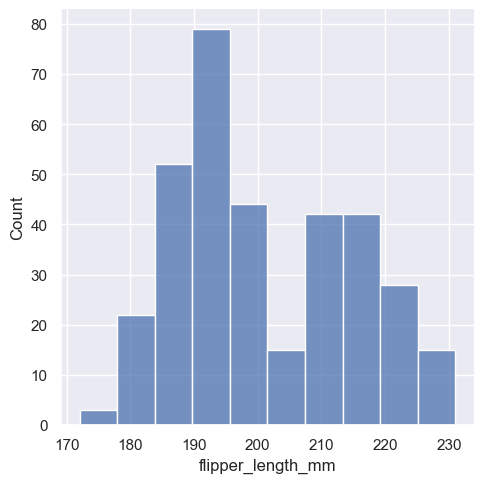

In [31]:
sns.displot(data=penguins, x="flipper_length_mm")

通过绘制直方图，我们能够立即获得关于“flipper_length_mm”（企鹅的鳍长，单位为毫米）这一变量的一些直观信息。具体来说，我们可以观察到大约195毫米的鳍长是最常见的，但是这个数据的分布是双峰的（bimodal），这意味着单一的数字（如最常见的鳍长）并不能完全代表整个数据集的特征。

这里的“双峰分布”指的是数据集中存在两个明显的峰值，这通常意味着数据被两个不同的群体或类别所主导，或者数据的生成过程可能受到两种不同因素的影响。因此，尽管195毫米是最常见的鳍长，但由于分布的双峰特性，我们不能简单地用这一个数字来概括整个数据集的鳍长情况。这强调了在分析数据时考虑数据分布形状的重要性。

### Choosing the bin size

我们可以通过设置 `bins`, `discrete` 参数解决 "变量的取值范围相对较小，并且是整数" 导致柱状图过于分散的问题.

In [32]:
tips = pd.read_csv("../../data/tips.csv")

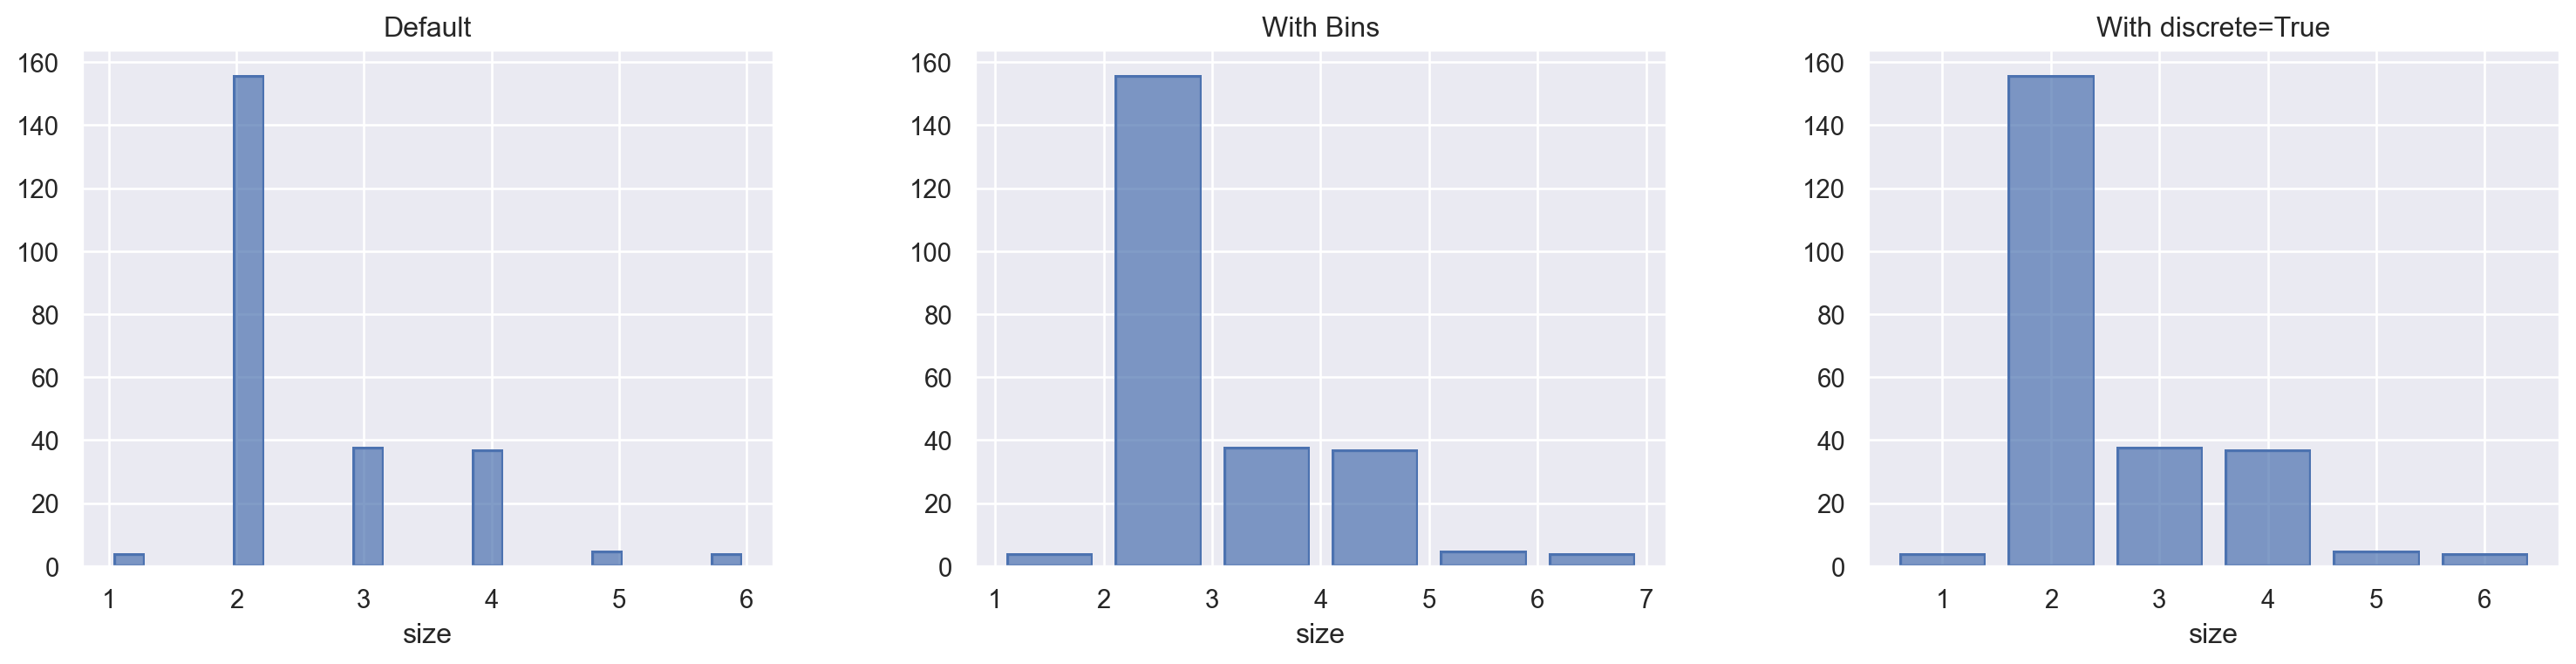

In [33]:
fig = mpl.figure.Figure(figsize=(16, 4))
sf1, sf2, sf3 = fig.subfigures(1, 3)

so.Plot(tips, x="size").add(so.Bar(), so.Hist()).on(sf1).label(title="Default").plot()
so.Plot(tips, x="size").add(so.Bar(), so.Hist(bins=[1, 2, 3, 4, 5, 6, 7])).on(
    sf2
).label(title="With Bins").plot()
so.Plot(tips, x="size").add(so.Bar(), so.Hist(discrete=True)).on(sf3).label(
    title="With discrete=True"
).plot()

### Conditioning on other variables

在理解了一个变量的分布之后，下一步常见的做法是探讨这个分布的特征是否在数据集中的其他变量之间有所不同。例如，上述提到的企鹅的鳍长分布是双峰的，需要找出是什么因素导致了这种分布。这里提到了`displot()`和`histplot()`函数，它们支持通过“色调”（hue）语义进行条件子集的划分。将一个变量分配给“色调”会为它的每个唯一值绘制一个单独的直方图，并通过颜色进行区分。

首先，当使用`hue`参数对数据进行条件子集的划分时，默认情况下，不同变量的直方图会“layered”（叠加）在一起。这意味着每个变量的直方图会一个接一个地堆叠在前一个直方图的顶部。然而，这样做在某些情况下可能会导致直方图之间难以区分，因为它们彼此覆盖。

为了解决这个问题，提供了一种解决方案：改变直方图的视觉表现形式，将默认的条形图（bar plot）变为“step”（阶梯图）的形式。使用`element="step"`参数可以生成阶梯图，这种图型通过将每个直方图的条形连接成阶梯状来展示数据，从而使得不同变量的直方图更加清晰可辨。

除了将不同变量的直方图“层叠”在一起之外，还可以选择将它们“堆叠”起来，也就是在垂直方向上移动。在这种堆叠的直方图中，整个直方图的轮廓会与只绘制单一变量的直方图的轮廓相匹配。

具体来说，当使用`hue`参数为直方图上色时，每个变量的唯一值都会生成一个单独的直方图，并且这些直方图会通过颜色进行区分。默认情况下，这些直方图是层叠在一起的，有时可能会难以区分。而选择“堆叠”的方式，就是将每个变量的直方图在垂直方向上错开，使得每个直方图的底部对齐，从而形成一个整体的直方图。这样，整个直方图的轮廓（即所有直方图叠加后的外轮廓）会与只绘制单一变量时的直方图轮廓相同。

这种方法强调了变量之间的部分-整体关系，但可能会掩盖其他特征（例如，可能难以确定Adelie企鹅分布的模式）。因此，选择哪种方式来展示条件子集的直方图，需要根据具体的数据和分析目的来决定。

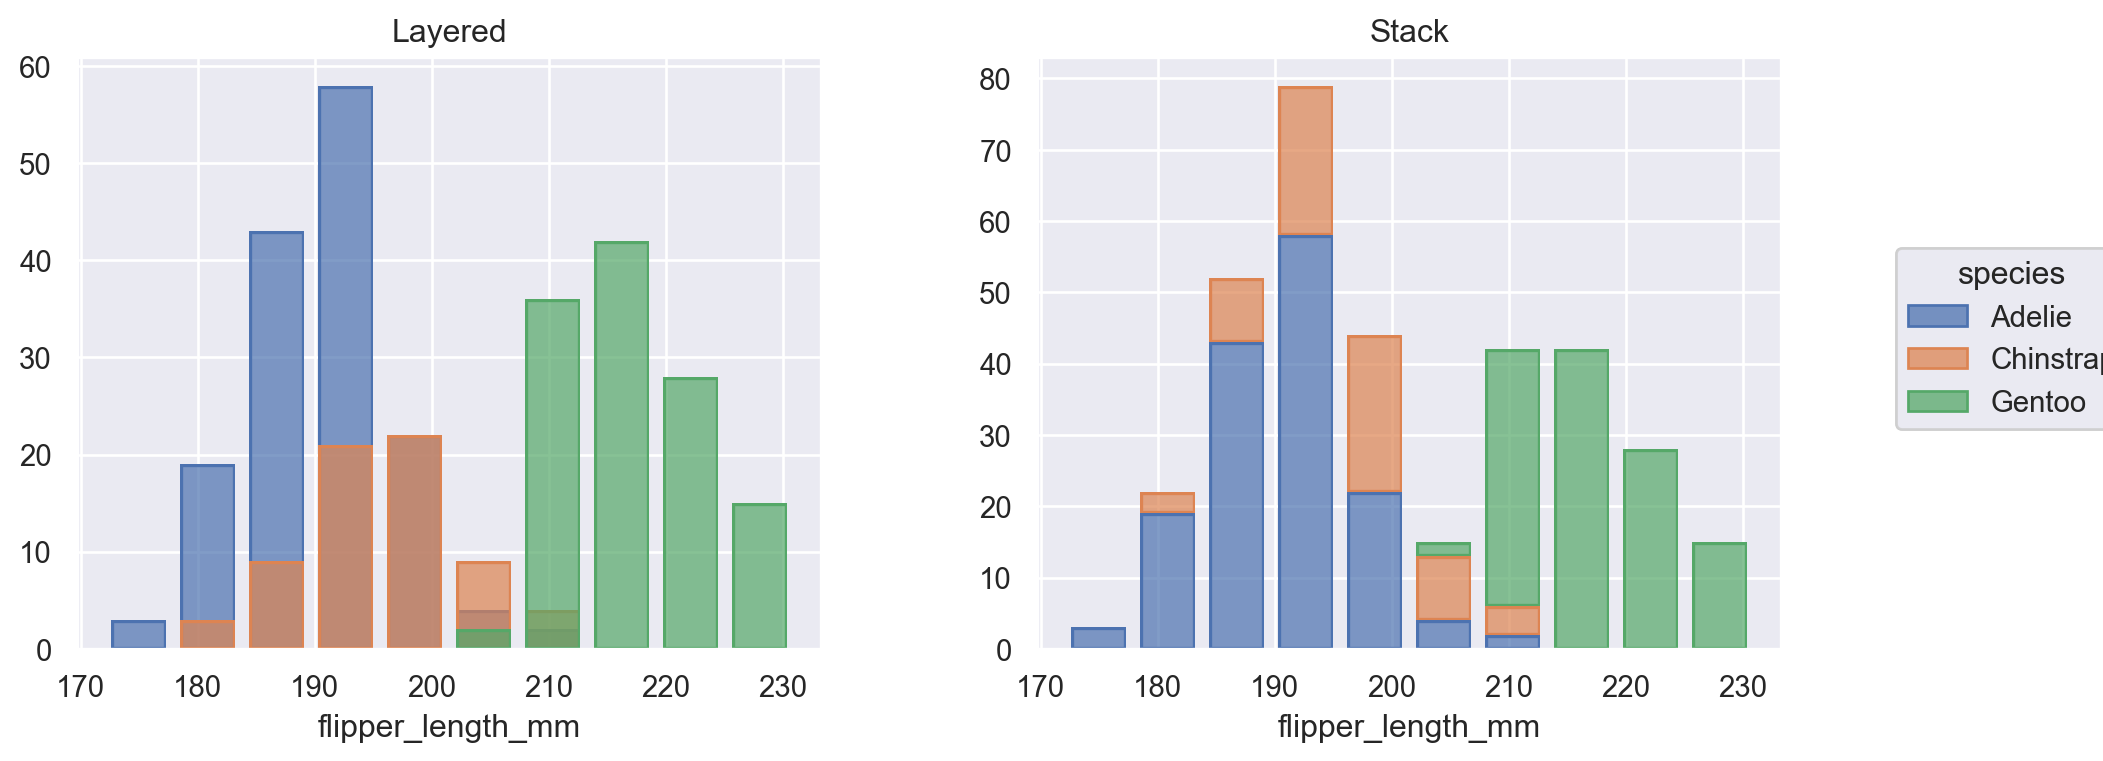

In [34]:
fig = mpl.figure.Figure(figsize=(10, 4))
(sf1, sf2) = fig.subfigures(1, 2)

so.Plot(penguins, x="flipper_length_mm", color="species").add(so.Bar(), so.Hist()).on(
    sf1
).label(title="Layered").plot()

so.Plot(penguins, x="flipper_length_mm", color="species").add(
    so.Bar(), so.Hist(), so.Stack()
).on(sf2).label(title="Stack").plot()

### Normalized histogram statistics

"Normalized histogram statistics" 指的是对直方图中的数据进行归一化处理后的统计信息。这种处理可以帮助我们更好地理解数据的分布特征，尤其是在需要比较不同数据集或进行数据标准化处理时。

在进行数据可视化或者数据分析时，如果数据集中的子集（例如不同种类的企鹅）包含的观察值数量不均等，直接比较它们在计数上的分布可能不是最佳选择。这是因为不同数量的观察值可能导致计数上的偏差，从而影响对数据分布的准确理解。

为了解决这个问题，作者提出了一个解决方案，即通过使用`stat`参数来对计数进行标准化。在Python的`seaborn`库中，`displot`函数可以用来绘制分布图，其中`stat`参数可以用来指定统计方法。例如，使用`stat="density"`可以对数据进行密度标准化，使得不同子集的分布可以在同一尺度上进行比较，即使它们的观察值数量不同。

默认情况下，直方图的统计数据（这里指的是密度）是针对整个数据分布进行标准化的，这仅仅是重新调整了条形的高度。这样做的结果是，所有的条形图的高度都是相对于整个数据集的总和来调整的。

然而，如果将`common_norm`参数设置为`False`，每个子集（在这个上下文中指的是不同种类的企鹅）将独立地进行标准化。这意味着每个子集的条形图的高度将根据它们自己内部的分布来调整，而不是相对于整个数据集。这样做可以更公平地比较不同子集的分布，即使它们的观测数量不平等。

简而言之，`common_norm=True`（默认设置）会将所有数据作为一个整体来标准化，而`common_norm=False`会让每个子集独立地进行标准化。

Text(0.5, 1.0, 'common_norm=False')

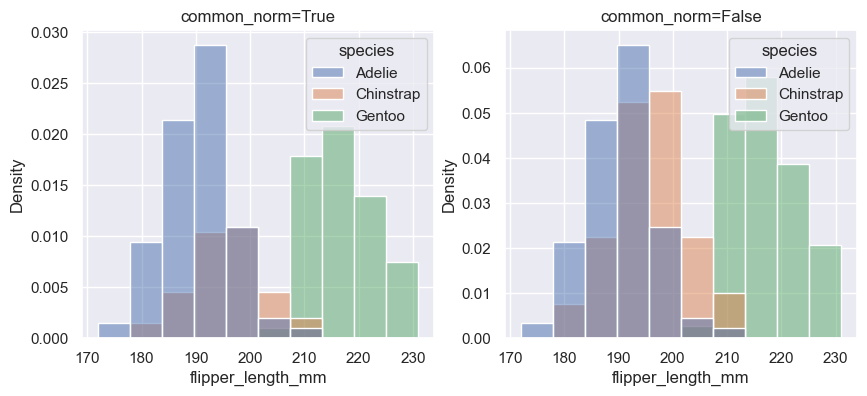

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    stat="density",
    ax=axes[0],
)
axes[0].set_title("common_norm=True")

sns.histplot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    stat="density",
    ax=axes[1],
    common_norm=False,
)
axes[1].set_title("common_norm=False")

在统计学和数据可视化中，归一化（normalization）的方法有多种，每种方法的目的不同，适用于不同的场景。除了 `density` 归一化方法外，以下是一些常见的归一化方法：

- **Proportion (比例归一化)**
   - **定义**: 将每个数据点的值转换为它在数据集中的相对比例，使得所有数据点的比例总和为 1。
   - **应用**: 这种方法常用于直方图或条形图，特别是在 `stat="proportion"` 的情况下。例如，将每个 bin 中的频数除以总频数。
   - **示例**: 在 Seaborn 中，使用 `stat="proportion"` 来绘制比例归一化的直方图。
   ```python
   sns.histplot(data=penguins, x="flipper_length_mm", hue="species", stat="proportion")
   ```

- **Cumulative (累积归一化)**
   - **定义**: 将每个数据点的值转化为累积值，即当前值加上所有前面数据点的值。结果是一个从 0 到 1 的累计分布。
   - **应用**: 这种方法用于累积直方图或累积分布函数 (CDF)，用于查看数据的累积分布。
   - **示例**: 在 Seaborn 中，使用 `stat="density"` 和 `cumulative=True` 来绘制累积分布图。
   ```python
   sns.histplot(data=penguins, x="flipper_length_mm", hue="species", stat="density", cumulative=True)
   ```

- **Count (计数归一化)**
   - **定义**: 这种方法直接显示数据的计数（频数），不进行任何归一化处理。
   - **应用**: 默认情况下，直方图会使用这种方法来展示每个 bin 中的数据点数量。
   - **示例**: 在 Seaborn 中，默认情况下 `stat="count"`。
   ```python
   sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
   ```

- **Frequency (频率归一化)**
   - **定义**: 将每个 bin 的频数除以 bin 的宽度，使得直方图的总面积等于频数总和。
   - **应用**: 在一些情况下，与 `density` 类似，但通常是当 bin 宽度不等时使用。
   - **注意**: Seaborn 没有专门的 `stat="frequency"`，但你可以通过修改 bin 宽度来达到类似效果。

- **Z-score 标准化**
   - **定义**: 将数据的均值移除，并将数据缩放到以标准差为单位的范围内。公式为 `(x - mean) / std`。
   - **应用**: 在机器学习和统计分析中广泛使用，以标准化数据以消除量纲差异。
   - **注意**: Seaborn 不直接支持 `Z-score` 标准化，可以通过 Pandas 或 Numpy 预处理数据后再进行可视化。

- **Min-Max 归一化**
   - **定义**: 将数据缩放到 [0, 1] 的范围内，公式为 `(x - min) / (max - min)`。
   - **应用**: 常用于将特征值缩放到统一范围，以便比较或输入到机器学习算法中。
   - **注意**: 需要在绘图前对数据进行预处理，Seaborn 不直接提供这种标准化。

- **Log 归一化**
   - **定义**: 将数据的对数值作为新值，常用于处理具有长尾分布的数据。
   - **应用**: 在可视化数据的乘法或指数关系时特别有用，能够压缩数据范围。
   - **注意**: 需要在绘图前对数据进行预处理。


**"量纲差异"（Dimensional Difference）** 指的是在数据集中的不同特征（变量）之间，由于它们的单位或尺度不同，导致它们的数值范围差异很大。例如：

- 一个特征表示房屋面积，单位是平方米（m²），数值范围可能在几百到几千之间。
- 另一个特征表示房屋的房间数，单位是个数，数值范围可能在 1 到 10 之间。

因为这两个特征的单位不同，它们的数值大小也相差很大。如果直接将它们输入到某些算法中，尤其是涉及距离计算的算法（如 k 近邻、支持向量机），大数值的特征可能会对结果产生更大的影响，从而掩盖了小数值特征的重要性。这种现象就是量纲差异。

为什么量纲差异很重要？

在机器学习和数据分析中，量纲差异会影响算法的表现和分析的准确性。例如：

- **距离度量**: 在计算欧氏距离或曼哈顿距离时，较大的特征会主导距离的计算结果，可能导致模型倾向于只关注这些大数值特征，而忽略其他重要的小数值特征。

- **梯度下降**: 在梯度下降优化算法中，如果特征值的尺度差异很大，会导致收敛速度减慢，因为更新步长会受到大尺度特征的影响。

如何处理量纲差异？

为了解决量纲差异的问题，可以对数据进行标准化或归一化处理。常见的方法包括：

1. **标准化（Standardization）**: 也称为 Z-score 标准化，将特征值转换为均值为 0，标准差为 1 的分布。公式为 `(x - mean) / std`。这种方法使得特征值在标准正态分布下处理，适用于大多数机器学习算法。
2. **归一化（Normalization）**: 将特征值缩放到 [0, 1] 或 [-1, 1] 的范围内，常见的方式是 Min-Max 归一化，公式为 `(x - min) / (max - min)`。这种方法适合在数值范围有明确上限和下限的情况下使用。
3. **对数变换（Log Transformation）**: 对具有长尾分布的特征进行对数变换，可以压缩数据范围，减少量纲差异。

通过处理量纲差异，可以使得所有特征在同一尺度上进行比较，从而提高模型的性能和分析结果的准确性。

**频率 和 密度**

举例说明

假设我们有一个数据集 `[1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4]`，共 11 个数据点。

Step 1: 计算频数和频率

- **频数**（frequency）：每个数据点出现的次数：
  - 数据点 `1` 出现 `2` 次
  - 数据点 `2` 出现 `2` 次
  - 数据点 `3` 出现 `3` 次
  - 数据点 `4` 出现 `4` 次

- **频率**（relative frequency）：每个数据点的频数除以总数据点数 `11`：
  - 数据点 `1` 的频率：`2/11 ≈ 0.1818`
  - 数据点 `2` 的频率：`2/11 ≈ 0.1818`
  - 数据点 `3` 的频率：`3/11 ≈ 0.2727`
  - 数据点 `4` 的频率：`4/11 ≈ 0.3636`

Step 2: 计算密度

假设我们将这些数据点放入两个 bin 中，bin 的宽度不同：

- **bin 1**：包括数据点 `[1, 2]`，宽度为 `2`（从 `1` 到 `2`）。
- **bin 2**：包括数据点 `[3, 4]`，宽度为 `2`（从 `3` 到 `4`）。

现在，我们计算每个 bin 的密度：

- **bin 1**：
  - 频数：`2`（数据点 `1`）+ `2`（数据点 `2`）= `4`
  - bin 的宽度：`2`
  - 密度计算：

$$
\text{density} = \frac{\text{频数}}{\text{总样本数} \times \text{bin 宽度}} = \frac{4}{11 \times 2} ≈ 0.1818
$$

- **bin 2**：
  - 频数：`3`（数据点 `3`）+ `4`（数据点 `4`）= `7`
  - bin 的宽度：`2`
  - 密度计算：

$$
\text{density} = \frac{7}{11 \times 2} ≈ 0.3182
$$

Step 3: 解释频率与密度的区别

- **频率**: 是每个数据点的相对出现次数，它只反映了每个单独数据点的出现频率，所有频率相加等于 1。

- **密度**: 是在考虑 bin 宽度的情况下，对一组数据点的相对分布进行归一化的结果。密度反映了数据在特定区间（bin）内的分布情况。密度值的总和等于 1。

在这个例子中，尽管 `bin 1` 和 `bin 2` 的频率（或频数相加后的结果）可能直接反映了数据点的分布情况，但密度提供了一个更直观的理解，尤其是在 bin 宽度不同时。

- **不同的 bin 宽度**：如果 bin 宽度不同，频率和密度之间的区别就会更加明显。例如，在较宽的 bin 中，数据点可能被“稀释”了，因此密度值会较低。密度反映了单位区间内的数据浓度。

总结

- **频率**：仅仅反映了数据点的相对出现次数，与 bin 的宽度无关。
- **密度**：在考虑 bin 宽度的情况下，对频率进行调整，使得密度值能够更好地反映数据在某个区间内的分布浓度。

这个例子说明了为什么在某些情况下需要计算密度，而不仅仅是频率。密度可以帮助我们在不同的区间内更好地理解数据的分布，特别是在 bin 宽度不同时。

## Kernel density estimation

首先，直方图是一种用来近似表示生成数据的概率密度函数的工具。它通过将数据分成若干个区间（称为“bin”），然后计算每个区间内的数据点数量来实现这一点。这种方法可以让我们直观地看到数据的分布情况，比如数据的集中趋势、偏态分布等。

接着，文中提到核密度估计（KDE）是一种不同的解决方案。与传统的直方图不同，KDE不使用离散的区间来分组数据，而是使用高斯核（Gaussian kernel）来平滑数据点，生成一个连续的密度估计。高斯核是一种平滑函数，它可以在不将数据离散化的情况下，对数据的分布进行估计，从而得到一个连续的曲线。

总结来说，直方图和KDE两种方法用于估计数据的分布情况，其中直方图通过分组计数来近似概率密度函数，而KDE则通过平滑数据点来生成连续的密度估计。

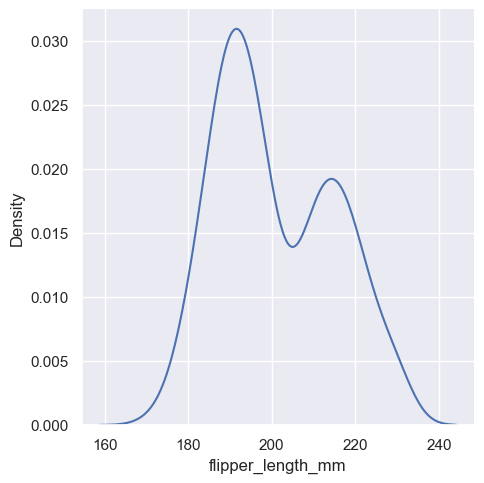

In [36]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth

- **核密度估计（KDE）**：这是一种用于估计概率密度函数的非参数方法，它可以用来平滑地表示数据分布，类似于直方图中的柱状图，但是没有固定的“箱”或“bin”。
- **平滑带宽（smoothing bandwidth）**：这是KDE中的一个重要参数，它决定了估计的平滑程度。带宽的大小直接影响到估计结果的平滑性。
- **直方图的箱大小**：在直方图中，箱的大小决定了每个柱状图的宽度，这与KDE中的带宽类似，因为它们都影响数据分布的表示方式。
- **估计的准确性**：KDE能否准确反映数据的分布，取决于带宽的选择。如果带宽选择不当，可能会影响结果的准确性。
- **过平滑（over-smoothed）**：如果带宽设置得太大，KDE的估计结果可能会过于平滑，导致一些有意义的特征（如数据的双峰分布）被抹去。
- **欠平滑（under-smoothed）**：如果带宽设置得太小，KDE的估计结果可能会过于粗糙，使得真实的数据形状被随机噪声所掩盖。
- **检查估计的稳健性**：为了确保KDE估计的准确性，可以通过调整默认的带宽来检查估计结果的稳健性。稳健性是指估计结果对带宽变化的敏感程度。
- **调整默认带宽**：可以通过修改`bw_adjust`参数来调整带宽，从而观察不同带宽设置下KDE的估计结果，以找到最合适的带宽值。

Text(0.5, 1.0, 'bw_adjust=2')

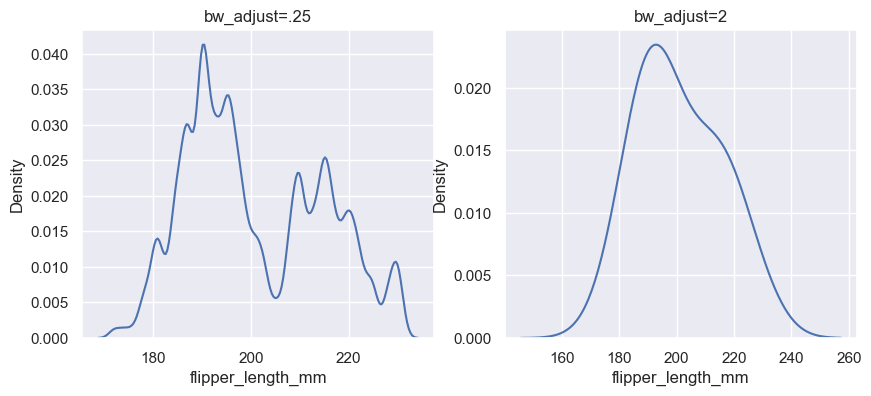

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(penguins, x="flipper_length_mm", bw_adjust=0.25, ax=axes[0])
axes[0].set_title("bw_adjust=.25")

sns.kdeplot(penguins, x="flipper_length_mm", bw_adjust=2, ax=axes[1])
axes[1].set_title("bw_adjust=2")

### Conditioning on other variables

在使用核密度估计（KDE）绘制数据分布图时，如果你指定了一个颜色变量（hue variable），系统会为该变量的每个级别（level）分别计算一个密度估计。这与直方图（histograms）的处理方式相似，直方图也会为不同的变量级别分别绘制不同的柱状图。

具体来说，“hue variable”指的是用于区分不同类别或组的变量。例如，在分析企鹅数据集时，如果将“species”（物种）作为颜色变量，那么对于每个企鹅物种，都会计算并绘制一个单独的核密度估计图。这样，不同的物种的分布情况可以通过颜色区分开来，便于比较和分析。

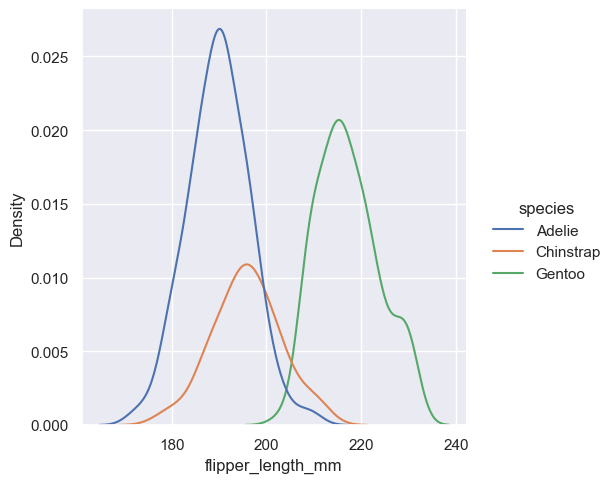

In [38]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

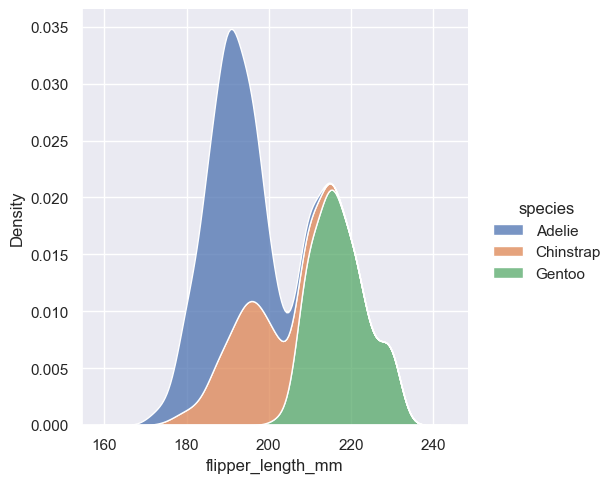

In [39]:
sns.displot(
    penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack"
)

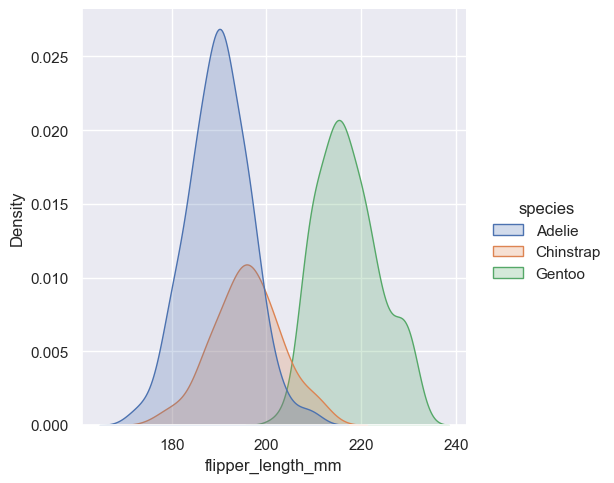

In [40]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

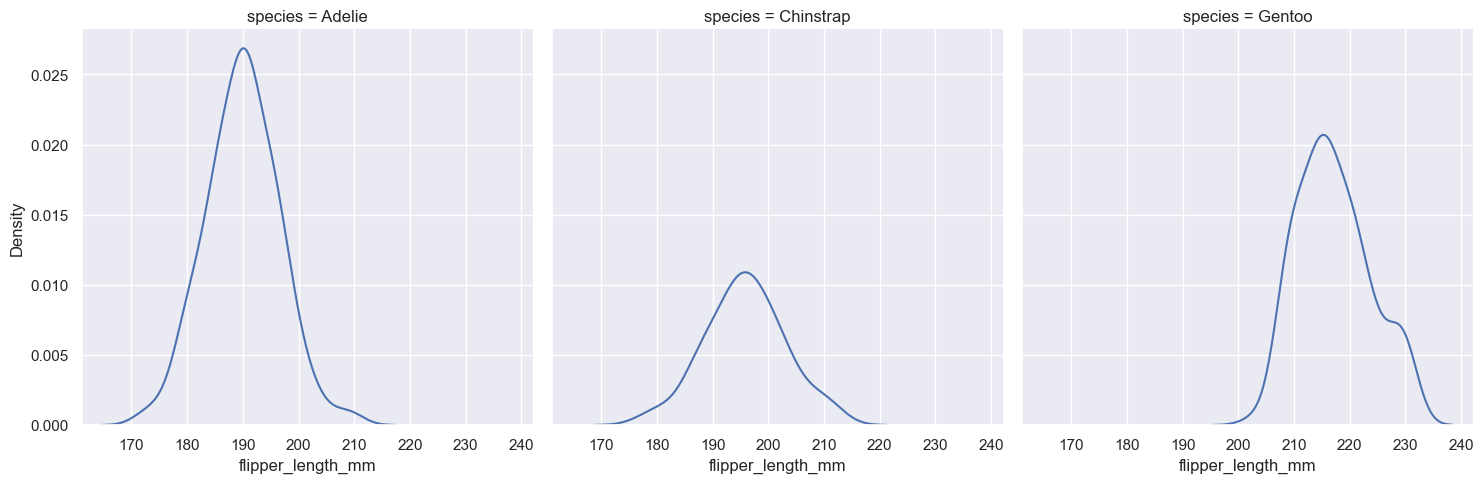

In [41]:
sns.displot(penguins, x="flipper_length_mm", col="species", kind="kde")

### Kernel density estimation pitfalls

核密度估计（Kernel Density Estimation, KDE）是一种用于估计概率密度函数的非参数方法。它具有许多优势，例如：

- **数据特征易于识别**：KDE图可以清晰地展示数据的重要特征，如中心趋势（central tendency，即数据的中心位置，通常由均值或中位数表示）、双峰性（bimodality，即数据分布有两个峰值）和偏斜性（skew，即数据分布的不对称性）。
- **便于比较子集**：KDE图可以方便地比较不同数据子集的分布情况。

然而，KDE在某些情况下可能无法很好地表示底层数据。这是因为KDE的逻辑假设底层分布是平滑且无界的。这种假设可能在以下情况下失败：

- **变量自然受限**：当变量反映的是一个自然受限的数量时，比如一个不能为负的变量，这种假设就可能不成立。如果观察值靠近这个界限（例如，一个不能为负的变量的较小值），KDE曲线可能会延伸到不切实际的值。

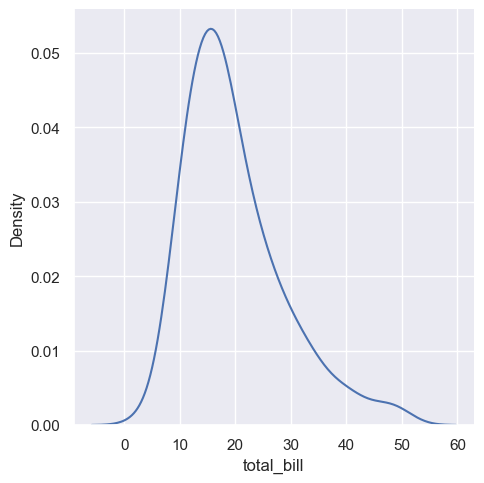

In [42]:
sns.displot(tips, x="total_bill", kind="kde")

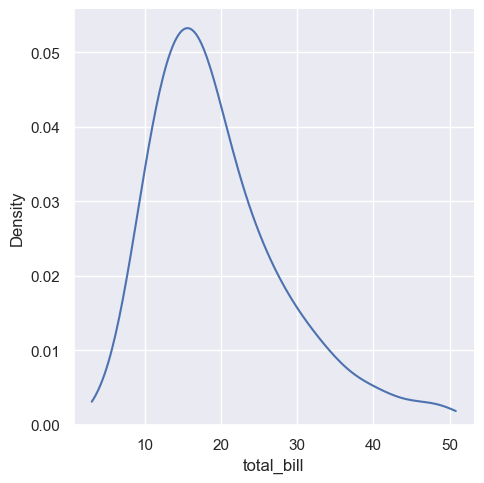

In [43]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

上面的图表展示了数据会出现小于0的数据, 这明显不符合常识, 这就是因为 KDE 的问题.

`cut`参数是Seaborn库中`displot`函数的一个选项，它用来指定KDE曲线应该延伸到数据极端值之外多远。通过设置`cut`参数，可以避免KDE曲线在数据的自然边界之外延伸太远，从而减少不切实际的值的出现。

然而，即使设置了`cut`参数，它也只是影响曲线的绘制位置，而不影响密度估计本身的计算。KDE在没有数据存在的范围内仍然会进行平滑处理，这可能导致在分布的极端值处密度被人为地低估。

其次，核密度估计在处理离散数据或数据自然连续但某些特定值被过度表示时也会失败。重要的是要记住，无论数据本身是否平滑，KDE总是会显示一个平滑的曲线。

例如，考虑钻石重量的分布情况，KDE可能会显示出围绕特定值的峰值，但实际上，直方图会揭示出一个更加参差不齐的分布。

1. KDE可能不适合自然有界或离散的数据。
2. KDE总是显示平滑曲线，即使数据本身并不平滑。
3. 即使在数据分布不平滑的情况下，KDE也可能显示出误导性的平滑曲线。

Text(0.5, 1.0, 'Histogram')

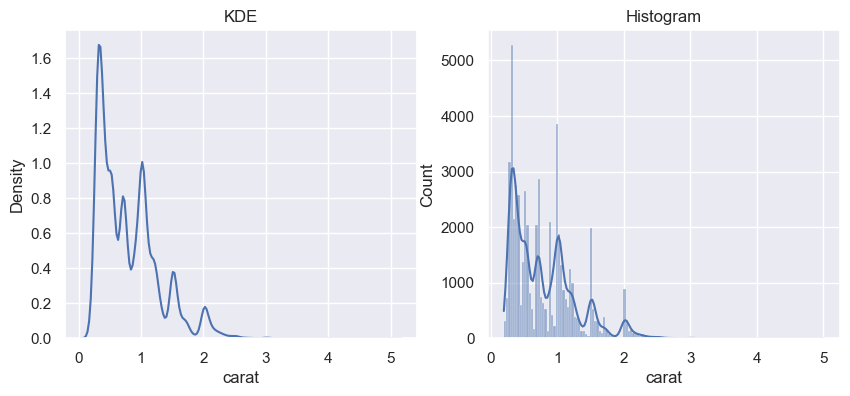

In [44]:
diamonds = pd.read_csv("../../data/diamonds.csv")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(diamonds, x="carat", ax=axes[0])
axes[0].set_title("KDE")

sns.histplot(diamonds, x="carat", kde=True, ax=axes[1])
axes[1].set_title("Histogram")

## Empirical cumulative distributions

ECDF（经验累积分布函数）图有两个主要优势。与直方图或核密度估计（KDE）不同，ECDF图直接表示每个数据点。这意味着不需要考虑箱宽或平滑参数。此外，由于曲线是单调递增的，它非常适合比较多个分布。

解释如下：

1. **直接表示每个数据点**：ECDF图通过绘制一条曲线，这条曲线通过数据集中的每个点，每个点的y值表示小于或等于该点的值的数据点所占的比例。这样，每个数据点都直接影响曲线的形状，而不需要像直方图那样将数据分箱，也不需要像KDE那样设置平滑参数。
2. **无需考虑箱宽或平滑参数**：在直方图中，需要选择一个箱宽来确定数据的分组，这可能会影响对数据分布的理解。在核密度估计中，需要选择一个带宽参数来控制平滑的程度。而ECDF图不需要这些设置，因此可以更直接地反映数据的分布。
3. **单调递增的曲线**：ECDF图的曲线是单调递增的，即从左到右，曲线的y值不会下降。这使得ECDF图非常适合用来比较不同数据集的分布情况，因为它直观地展示了数据点在不同分布中的累积比例。
4. **适合比较多个分布**：由于ECDF图的单调递增特性，我们可以很容易地比较不同数据集的分布情况。例如，如果两个ECDF曲线在某个点交叉，这意味着在该点左侧，一个数据集有更多小值，而在该点右侧，另一个数据集有更多大值。这种比较在直方图或KDE图中可能不那么直观。

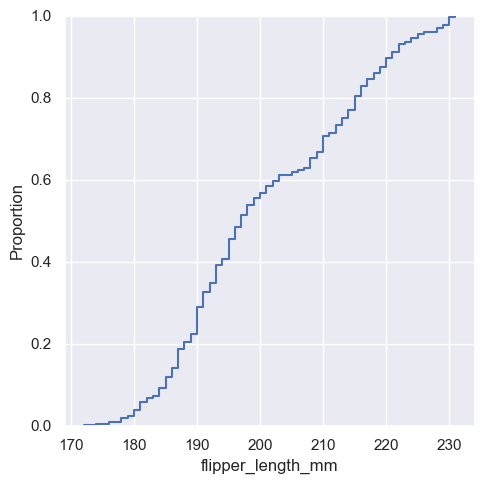

In [45]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

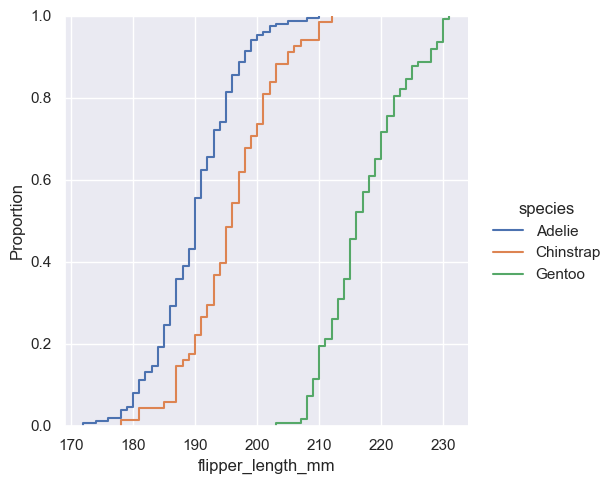

In [46]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

经验累积分布函数（ECDF）绘图的主要缺点.

首先，ECDF（Empirical Cumulative Distribution Function）是一种用于可视化数据分布的方法，它通过绘制一个单调递增的曲线来展示数据点，曲线的高度反映了具有较小值的观测值的比例。然而，与直方图或密度曲线相比，ECDF在直观地表示分布的形状方面存在不足。

直方图可以直观地展示数据的双峰性（bimodality），即数据分布有两个明显的峰值。在直方图中，如果数据具有双峰性，我们可以直接看到两个峰值。但在ECDF图中，双峰性并不那么明显，我们需要通过观察曲线的斜率变化来识别。

例如，如果ECDF曲线在某个区间内斜率较大，这可能意味着在这个区间内有更多的观测值，如果斜率在两个不同的区间内有不同的变化，这可能表明数据分布具有双峰性。

尽管ECDF在直观性上存在不足，但通过练习和熟悉，我们仍然可以通过ECDF图来解答关于数据分布的许多重要问题。例如，我们可以从ECDF图中识别出数据的中心趋势、偏斜性、是否存在异常值等。此外，由于ECDF是单调递增的，它非常适合用于比较多个分布。

总之，这段内容强调了虽然ECDF在直观性上不如直方图或密度曲线，但通过学习和实践，我们仍然可以有效地使用ECDF来分析和理解数据分布。

## Visualizing bivariate distributions

1. **双变量直方图**：这种图表通过在图中划分矩形区域（bin）来组织数据，每个矩形区域代表数据的一个子集。然后，根据每个矩形区域内观察值的数量，使用填充颜色来展示。这与热图（heatmap）相似，热图中颜色的深浅表示数据点的密集程度。
2. **双变量核密度估计（KDE）图**：与直方图不同，KDE图使用二维高斯函数来平滑处理(x, y)坐标上的观察值。这可以更好地展示数据点的分布，因为它可以平滑地过渡数据点，而不是将它们限制在固定的矩形区域内。默认情况下，KDE图会展示二维密度的等高线（contours），这些等高线表示了数据点分布的边界或区域。

Text(0.5, 1.0, 'Bivariate KDE')

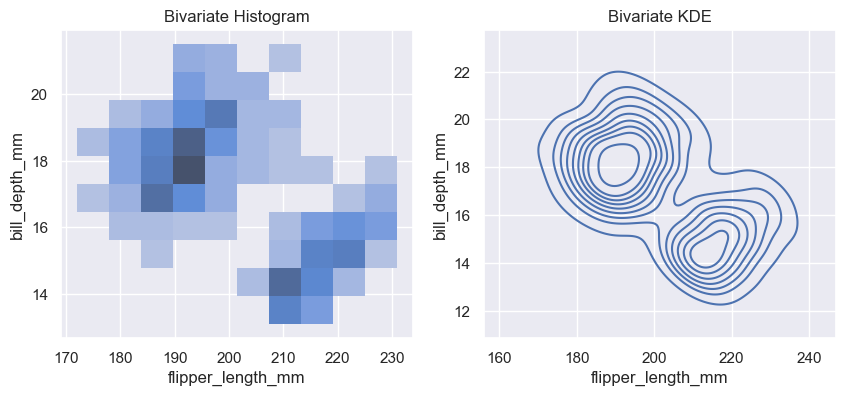

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(penguins, x="flipper_length_mm", y="bill_depth_mm", ax=axes[0])
axes[0].set_title("Bivariate Histogram")

sns.kdeplot(penguins, x="flipper_length_mm", y="bill_depth_mm", ax=axes[1])
axes[1].set_title("Bivariate KDE")

**双变量直方图**

- 分布模式：在这个双变量直方图中，数据的分布是以颜色表示的。颜色越深的矩形区域表示该区域的数据点越多。可以看到，这张图中颜色深的矩形主要集中在图的中间部分，这说明大部分的数据点集中在这个区域。整个图显示的是一种集中在中心区域的分布模式。
- 数据集中趋势：图中的深色区域清晰地显示了数据的集中趋势。颜色最深的区域表明这是数据点最密集的地方，表示两个变量（图的X轴和Y轴）在这一范围内同时取值的频率最高。
- 相关性：从图中颜色深浅的变化来看，没有非常明显的对角线或倾斜的趋势，这说明这两个变量之间的线性相关性可能不强。如果相关性很强，通常会看到颜色沿对角线方向分布更深的趋势。这个图主要显示的是数据集中在某些特定范围内，而不是沿某个方向的相关性。

**双变量KDE图**

- 分布模式：KDE图使用等高线来展示两个变量的联合密度分布。等高线内部的区域表示密度较高的区域，可以看到图中有几个密集的等高线区域，表明数据集中在这些区域。等高线越密集的地方，说明数据的密度越高。
- 数据集中趋势：KDE图非常清晰地展示了数据的集中趋势。图中的密集等高线表明数据在某些特定区域（例如图的中央区域）高度集中。这与双变量直方图显示的数据集中趋势一致，但KDE图提供了一个更平滑的视角，帮助我们理解数据的连续分布。
- 相关性：在这个KDE图中，等高线的形状略呈椭圆形，并且略微倾斜，显示了一定的相关性。等高线的倾斜方向显示了两个变量之间存在的一种趋势，但这并不是一个非常强的相关性。等高线的形状较为平滑且略微倾斜，表明两个变量之间存在一些线性关系，但可能不是很强。

同时上面两张图都展示出数据具有双峰性.

Text(0.5, 1.0, 'Bivariate KDE')

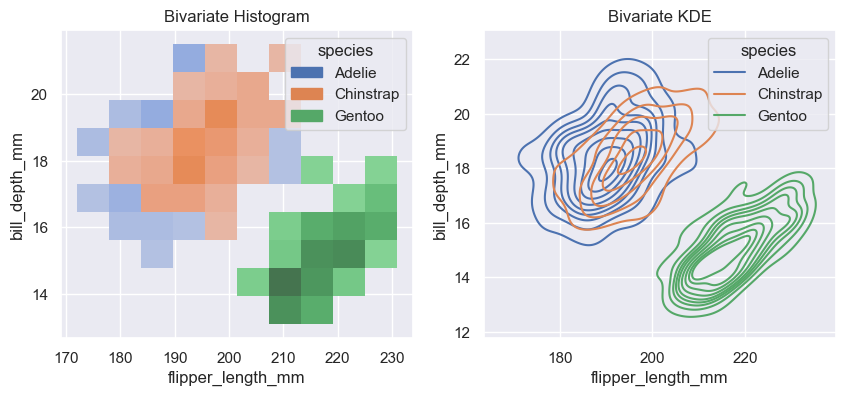

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(
    penguins, x="flipper_length_mm", y="bill_depth_mm", hue="species", ax=axes[0]
)
axes[0].set_title("Bivariate Histogram")

sns.kdeplot(
    penguins, x="flipper_length_mm", y="bill_depth_mm", hue="species", ax=axes[1]
)
axes[1].set_title("Bivariate KDE")

### 等高线的原理

生成的数据说明, 以 `x` 为例:

- 生成两个独立的正态分布数据集：
    - np.random.normal(loc=-2, scale=1, size=300)：生成一个服从均值为 -2，标准差为 1 的正态分布的300个数据点。
    - np.random.normal(loc=2, scale=1, size=300)：生成一个服从均值为 2，标准差为 1 的正态分布的300个数据点。
- 连接两个数据集：
    - np.concatenate([...])：将这两个300个数据点的数组拼接在一起，形成一个包含600个数据点的一维数组。

最终结果 x：
x 是一个包含600个数据点的数组，其中前300个数据点是来自均值为 -2，标准差为 1 的正态分布，后300个数据点是来自均值为 2，标准差为 1 的正态分布。这使得 x 的数据分布呈现出两个明显的中心，一个在 -2 附近，另一个在 2 附近。这种构造方法通常用于模拟双峰分布（bimodal distribution），即数据集中存在两个峰值的情况。

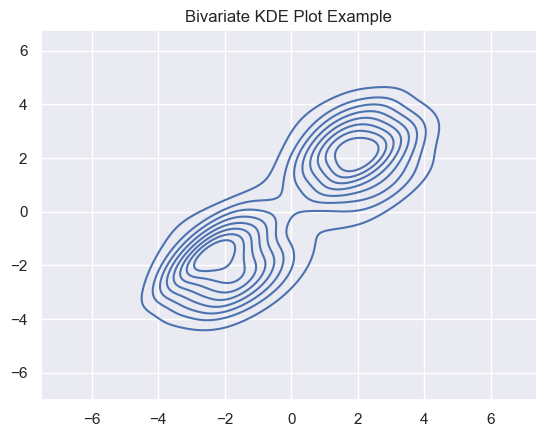

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(42)
x = np.concatenate(
    [
        np.random.normal(loc=-2, scale=1, size=300),
        np.random.normal(loc=2, scale=1, size=300),
    ]
)
y = np.concatenate(
    [
        np.random.normal(loc=-2, scale=1, size=300),
        np.random.normal(loc=2, scale=1, size=300),
    ]
)

# 绘制双变量KDE图
sns.kdeplot(x=x, y=y, thresh=0, levels=10)
plt.title("Bivariate KDE Plot Example")
plt.show()

图解与解释：
假设我们生成了上面的图，你会看到一个双变量KDE图，它由一些封闭的曲线组成，这些曲线形成了不同大小的“圈”，类似于地形图上的等高线。

1. 密度 (Density) 指的是什么？ 在双变量KDE图中，密度表示数据点在特定区域中的集中程度。它是一种平滑的方式，用来估计在某个区域内数据点的概率。密度越高，意味着数据点越集中。
    - 在图中，密度高的地方等高线会更加密集或颜色更加深。
    - 密度低的地方等高线会比较稀疏，颜色较浅。
2. p值是什么含义？
    - 在核密度估计中，p值通常不直接使用。相对而言，更常用的是“概率密度”这个概念，它表示某个点的概率密度函数（PDF）的值。核密度估计提供了一个关于数据在二维平面上出现频率的估计值，图中的等高线表示具有相同密度值的点。
3. threshold（阈值）是什么意思？ 在Seaborn中，thresh参数用于控制等高线图的绘制范围。如果某区域的密度低于这个阈值，那么这部分区域不会被绘制出来。
    - 在示例代码中，thresh=0意味着绘制所有区域的等高线，不管密度多低。
    - 如果thresh值设得较高，则只有密度较高的区域才会显示等高线，而低密度区域会被忽略。
4. 一圈线上的密度相等是什么意思？ 等高线图的每一条封闭线代表了相同密度的区域。就是说，这条线上的每个点都有相同的密度值，就像在地形图中等高线表示相同海拔高度一样。
    - 如果你沿着一条等高线移动，所有点的密度是相同的。
    - 越靠近中心的等高线通常表示更高的密度（更高的数据集中程度）。
5. 为什么画出来的圈有大有小？
    - 大圈：表示较低密度区域，通常是数据分布的外围。
    - 小圈：表示较高密度区域，通常是数据分布的核心区域。
6. 为什么圈是一个套一个的？ 这是因为密度是从外向内逐渐增加的，外面的圈表示低密度区域，里面的圈表示高密度区域。圈套圈的效果就像地形图中表示山峰的等高线，越靠近峰顶的等高线越小，表示海拔越高。

双变量直方图允许一个或两个变量是离散的。绘制一个离散变量和一个连续变量提供了另一种比较条件单变量分布的方法。

Text(0.5, 1.0, 'Both Discrete')

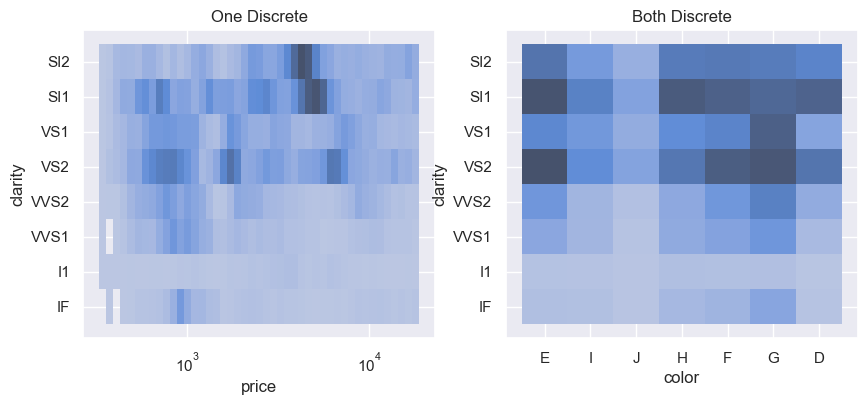

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(diamonds, x="price", y="clarity", log_scale=(True, False), ax=axes[0])
axes[0].set_title("One Discrete")

sns.histplot(diamonds, x="color", y="clarity", ax=axes[1])
axes[1].set_title("Both Discrete")

## Distribution visualization in other settings

还有一些 figure-level 的函数使用 `histplot()` 和 `kdeplot()` 函数.

### Plotting joint and marginal distributions

首先是 `jointplot()` 函数，它是用于增强二元关系或分布图的功能，通过展示两个变量的边际分布来实现。在默认情况下，`jointplot()`使用散点图（scatterplot）来表示二元分布，使用直方图（histplot）来表示边际分布。这里的“二元分布”指的是两个变量之间的关系，而“边际分布”则是指单独一个变量的分布情况。

具体来说，`jointplot()`函数可以用于可视化两个变量之间的关系，并且通过在图的边缘展示这两个变量各自的分布情况，从而提供更多的信息。例如，如果你正在研究企鹅的喙长度和喙深度之间的关系，使用`jointplot()`可以同时展示这两个变量的联合分布（即它们之间的关系）以及它们各自的分布情况。

在代码示例中，`jointplot()`被用来绘制企鹅数据集中的喙长度（`bill_length_mm`）和喙深度（`bill_depth_mm`）之间的关系，并且默认情况下，这种关系是通过散点图来表示的，而两个变量各自的分布则是通过直方图来展示的。

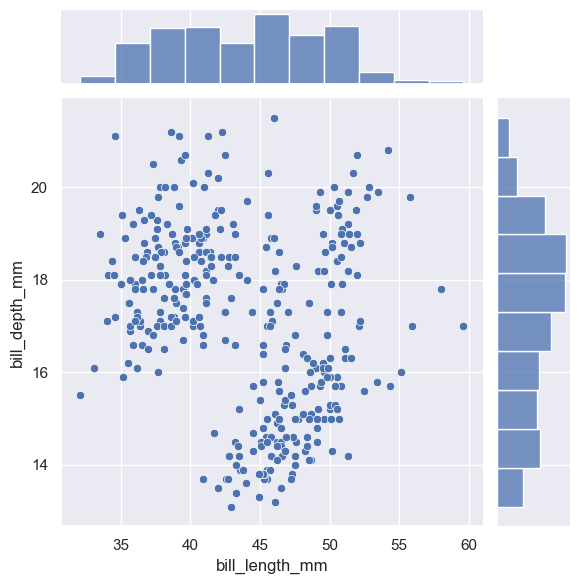

In [69]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

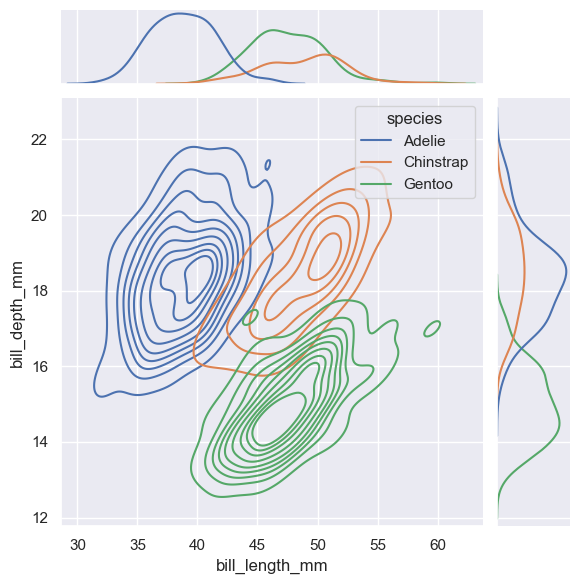

In [71]:
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", hue="species"
)

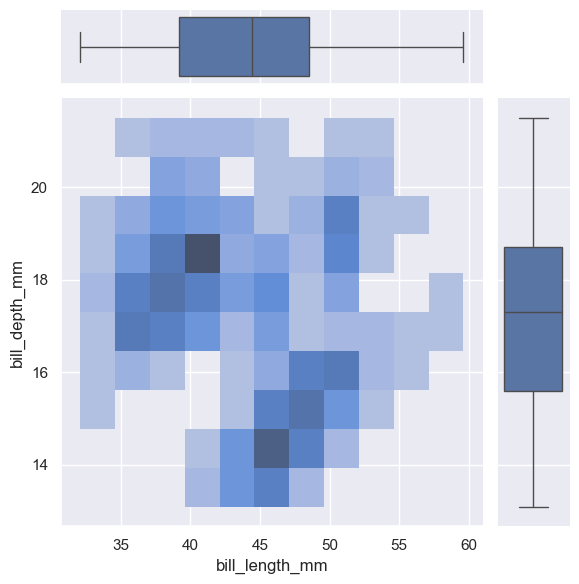

In [72]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

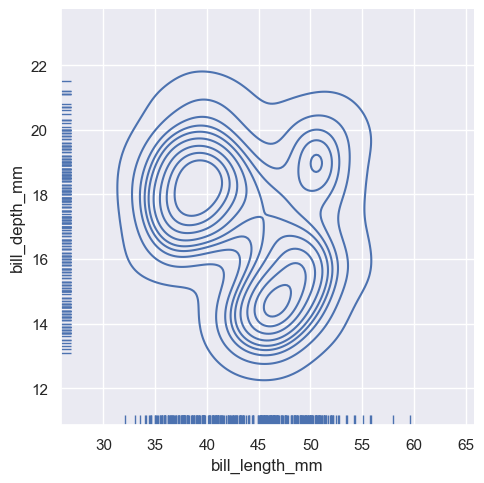

In [73]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", rug=True)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

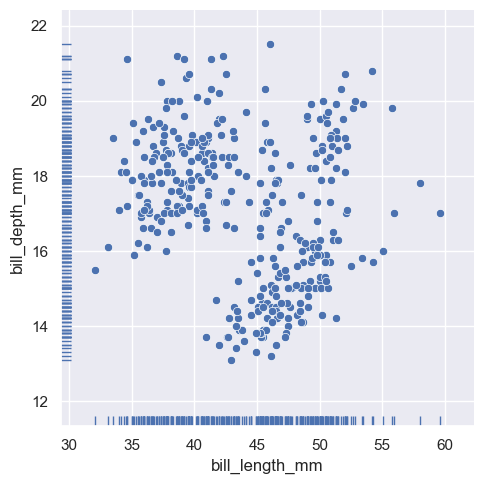

In [74]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions

`pairplot()` 函数的功能和使用方式。

- `pairplot()` 函数提供了一种联合分布（joint distributions）和边际分布（marginal distributions）的混合视图。联合分布显示两个变量之间的关系，而边际分布则显示单个变量的分布情况。
- 与 `jointplot()` 函数不同，`pairplot()` 并没有专注于单一变量之间的关系，而是采用了“小多重图”（small-multiple）的方法。这种方法通过创建多个小图来展示数据集中所有变量的单变量分布，以及它们之间的所有成对关系。
- 通过使用 `pairplot()`，可以同时观察到数据集中每个变量的分布情况，以及它们两两之间的相互作用或关系。

简单来说，`pairplot()` 是一个可视化工具，它能够展示一个数据集中所有变量的分布情况和它们之间的相互关系，通过创建一系列的小图来实现这一点。这种方法有助于快速理解数据的多维度特征和变量间的相互作用。

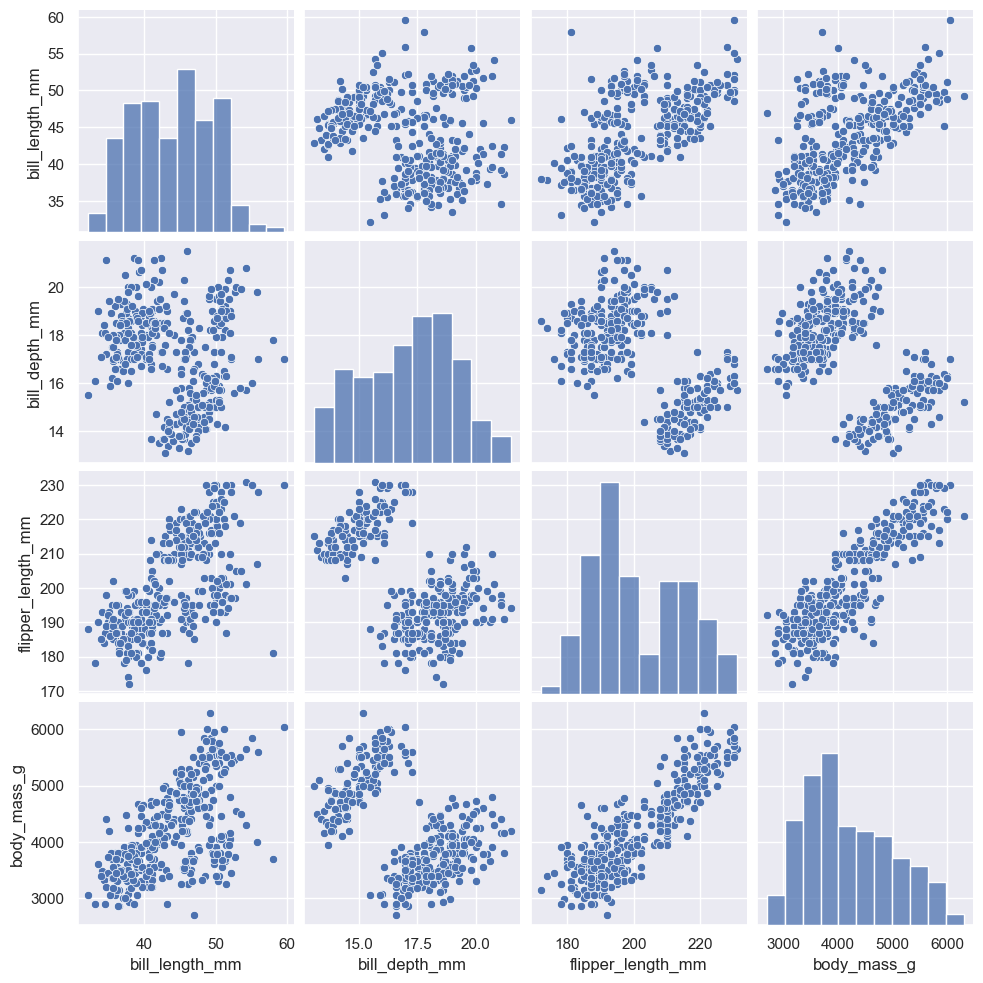

In [75]:
sns.pairplot(penguins)

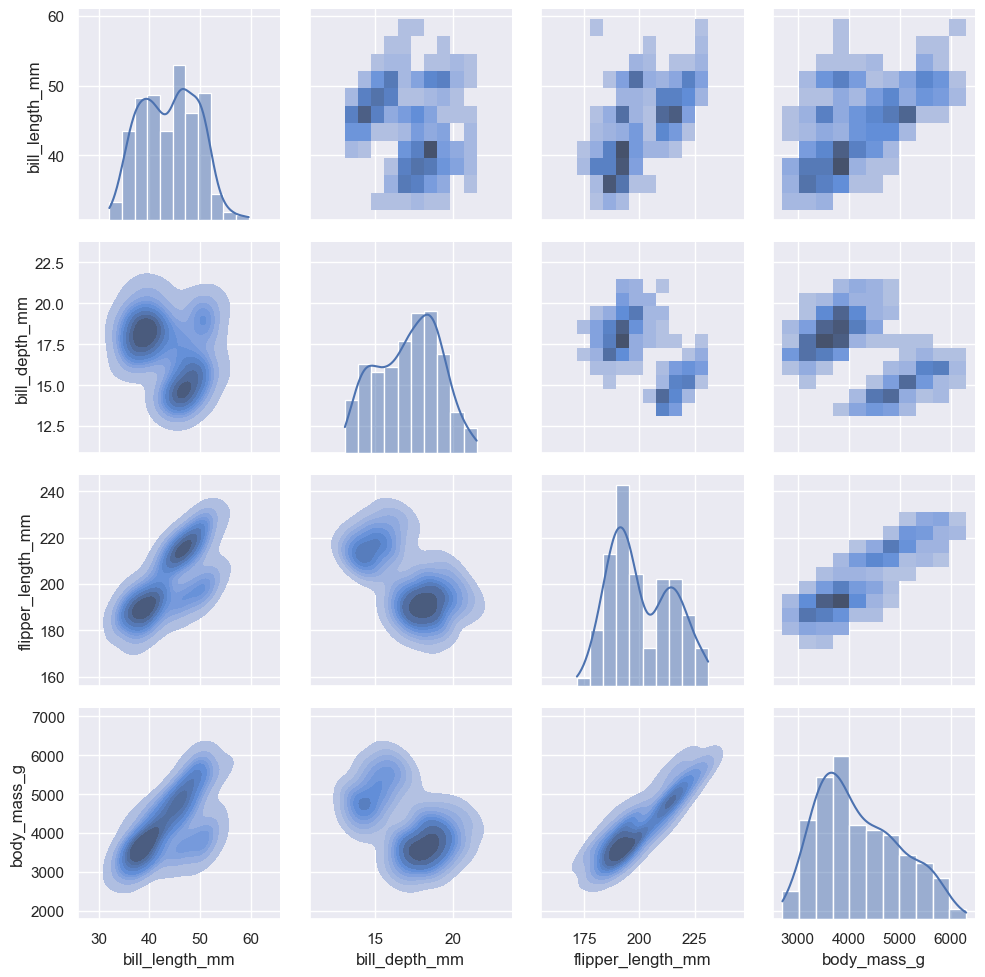

In [76]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)